# 1. Introduction





  
**Aim**: To develop a prediction model to determine species of the penguines and to predict the beak length (culmen length) of the penguine.
  
  **About the Data**

   The Palmer Penguins dataset contains size measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica. 



**The dataset consists of 7 columns.**










*   species:  penguin species (Chinstrap, Adélie, or Gentoo)
*   culmen_length_mm:  culmen length (mm)
*   culmen_depth_mm:  culmen depth (mm)
*   flipper_length_mm:  flipper length (mm)
*   body_mass_g:  body mass (g)
*   island:  island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago(Antarctica)
*   sex: penguin sex




**Some Terms to know**

1.   What are culmen length & depth?

     **Answer.** The culmen is "the upper ridge of a bird's beak".

2.   What are flippers?

     **Answer.** Penguins wings are called flippers. They are flat, thin, and broad with a long, tapered shape and a blunt, rounded tip.
















  Refrence to the dataset - https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

In [ ]:
pip install pycaret 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numba-0.54.1-cp37-cp37m-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.3 MB)
  Using cached llvmlite-0.37.0-cp37-cp37m-manylinux2014_x86_64.whl (26.3 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: numba
    Found existing installation: numba 0.56.4
    Uninstalling numba-0.56.4:
      Successfully uninstalled numba-0.56.4


In [ ]:
pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

# Terms to Know 

**Shap**


The SHAP summary graphic displays how each instance's features contribute (row of data). The model's raw prediction, or prediction made before applying the inverse link function, is equal to the total of the contributions from the features and the bias term.







**Cross Validation**


what is folds? 
K-fold cross-validation approach divides the input dataset into K groups of samples of equal sizes. These samples are called folds. For each learning set, the prediction function uses k-1 folds, and the rest of the folds are used for the test set. This approach is a very popular CV approach because it is easy to understand, and the output is less biased than other methods.

The steps for k-fold cross-validation are:

Split the input dataset into K groups

For each group:

1. Take one group as the reserve or test data set.

2. Use remaining groups as the training dataset
Fit the model on the training set and evaluate the performance of the model using the test set.


Let's take an example of 5-folds cross-validation. So, the dataset is grouped into 5 folds. On 1st iteration, the first fold is reserved for test the model, and rest are used to train the model. On 2nd iteration, the second fold is used to test the model, and rest are used to train the model. This process will continue until each fold is not used for the test fold.

more on folds - https://www.javatpoint.com/cross-validation-in-machine-learning

# 2. Understanding the Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./penguins_size.csv')

In [ ]:
#First 5 rows of data
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
#Checking the data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df.isna().sum()


species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

We can see that there is NaN values in culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, sex

# 3. Imputation

In [ ]:
df['sex'].fillna(df['sex'].mode()[0],inplace=True)

Imputing sex data with most frequently occuring data

In [ ]:
features_with_NaN=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
for i in features_with_NaN:
  df[i].fillna(df[i].mean(),inplace=True)

In [ ]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

we see post imputation no NaN values.

# 4. Visualization 

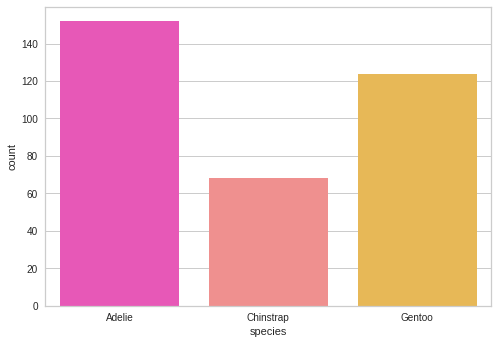

In [ ]:
import seaborn as sns
sns.countplot(df['species'],palette='spring');

We see that our data is mildly imbalanced. As the data is not that big we will not be upscale the minority class or downscale the majority class



More on ---

what is Unbalace in data? 

what upscaling is ?

what downscaling is?

check this out - https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data 

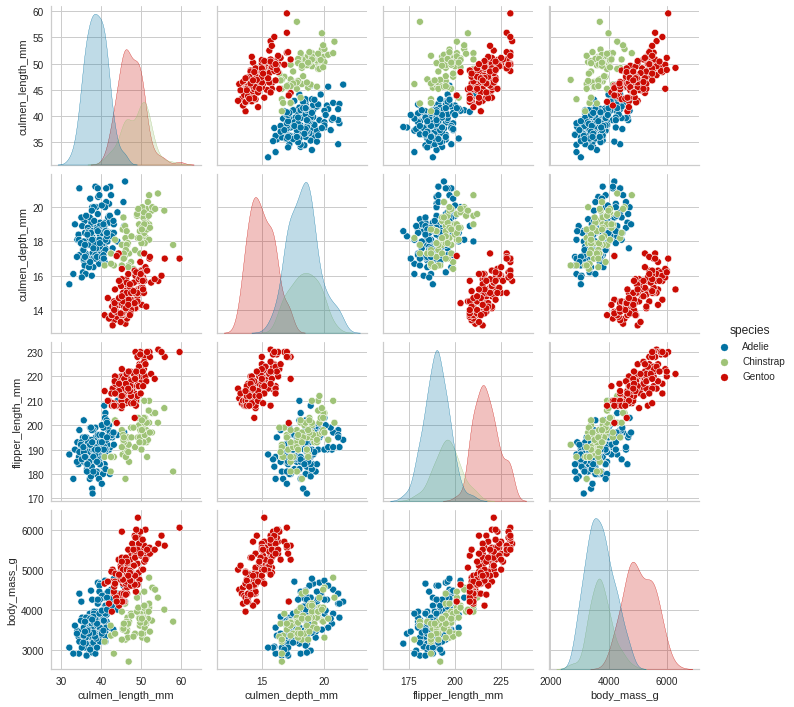

In [ ]:
sns.pairplot(df,hue='species');

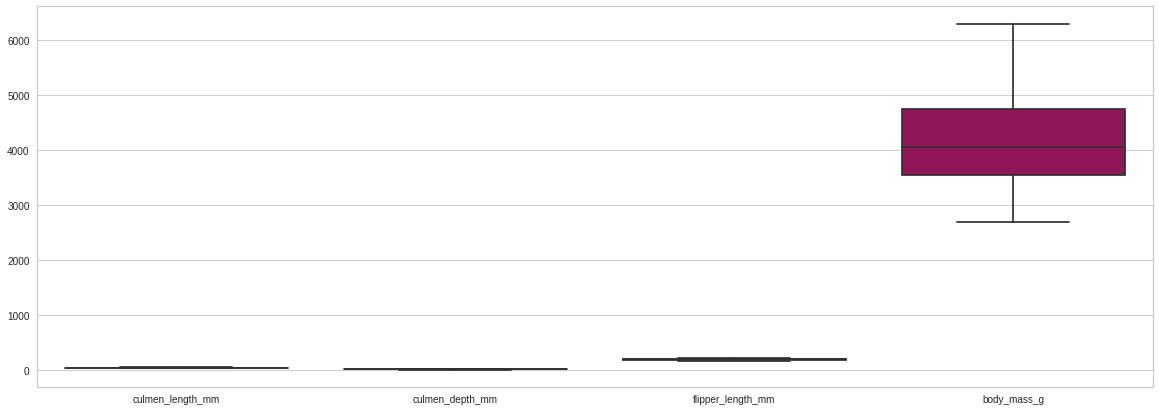

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df)

From the above we can conclude that the feature have variable ranges/not in same range. 

In [ ]:
df_numeric=df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
df_numeric = pd.DataFrame(scaler.fit_transform(df_numeric),columns=df_numeric.columns)
df_numeric.head()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,-8.870812e-01,7.877425e-01,-1.422488,-0.565789
1,-8.134940e-01,1.265563e-01,-1.065352,-0.503168
2,-6.663195e-01,4.317192e-01,-0.422507,-1.192003
3,-1.307172e-15,1.806927e-15,0.000000,0.000000
4,-1.328605e+00,1.092905e+00,-0.565361,-0.941517


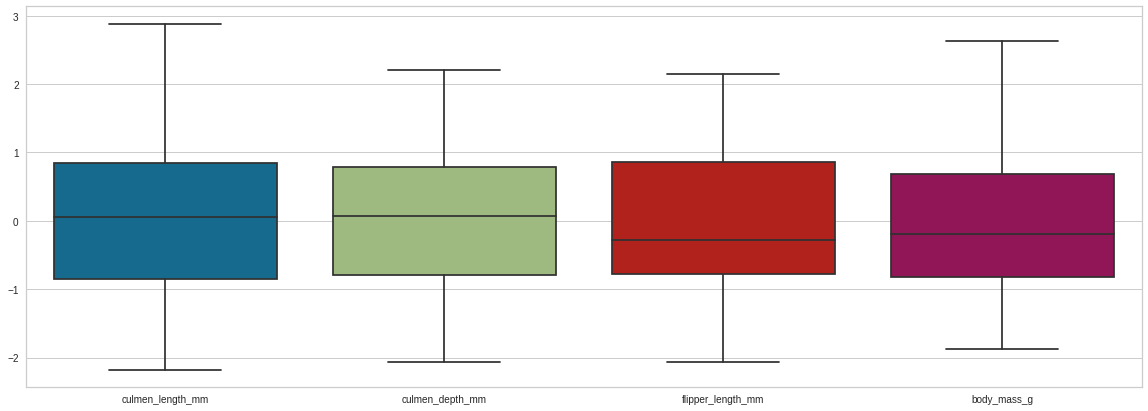

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df_numeric)

now we have scaled data for numeric features

In [ ]:
df_multiclass=df[['sex','species','island']]

In [ ]:
df = pd.concat([df_numeric, df_multiclass], axis=1, join='inner')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   344 non-null    float64
 1   culmen_depth_mm    344 non-null    float64
 2   flipper_length_mm  344 non-null    float64
 3   body_mass_g        344 non-null    float64
 4   sex                344 non-null    object 
 5   species            344 non-null    object 
 6   island             344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


**Checking Catagorical Data**

In [ ]:
df.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [ ]:
df['island'].head(5)

0    Torgersen
1    Torgersen
2    Torgersen
3    Torgersen
4    Torgersen
Name: island, dtype: object

In [ ]:
df.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [ ]:
df.sex.value_counts()

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

there is a some irregularity in data. An additional field '.' exist

In [ ]:
df[df['sex']=='.']

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species,island
336,0.106346,-0.738072,1.148892,0.843191,.,Gentoo,Biscoe


In [ ]:
df.loc[336,'sex'] = 'FEMALE'

Changed the '.' value to the most frequent value in the particular feature column.

In [ ]:

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# integer encode
label_encoder = LabelEncoder()
df['species']= label_encoder.fit_transform(df['species'])
df['island']= label_encoder.fit_transform(df['island'])
df['sex']= label_encoder.fit_transform(df['sex'])


In [ ]:
corr=df.corr()

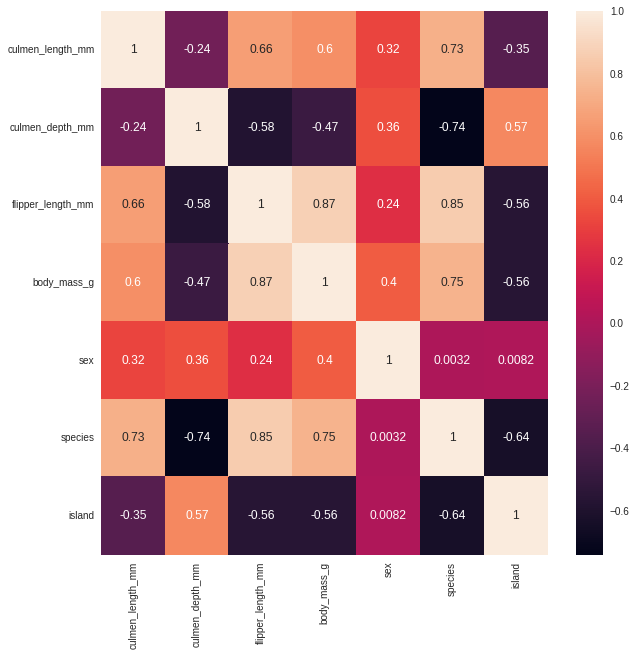

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,xticklabels=df.columns,yticklabels=df.columns,annot=True,ax=ax)

We can see that most of the features contribute to our target variable(species) except for sex which has a lower value. Flipper_length_mm being a independent variable highly related to target(species). we also observe collinearity between features Flipper_length_mm and body_mass_g

# 5. Data test Split

In [ ]:
from sklearn.model_selection import train_test_split

df, df_unseen = train_test_split(df, test_size=0.1, random_state=25)

print(df.shape)
print(df_unseen.shape)

(309, 7)
(35, 7)


In [ ]:
pip install numba --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numba-0.56.4-cp37-cp37m-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.5 MB)
  Using cached llvmlite-0.39.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.6 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.10 requires numba<0.55, but you have numba 0.56.4 which is incompatible.


In [ ]:
from pycaret.classification import *

# Auto ML - MultiClass Classification

In [ ]:
model_description = setup(data = df, target = 'species',feature_selection = True,feature_selection_threshold=0.50,remove_multicollinearity = True, multicollinearity_threshold = 0.8)

,Description,Value
0,session_id,6044
1,Target,species
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(309, 7)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='species',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                 Advanced_Feature_Selection_Classic(ml_usecase='classification',
                                                    n_jobs=-1,
                              

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. 

setup() must be called before executing any other function in pycaret.

In [ ]:
print(model_description)

(None, False, True, False, 'lightgbm', 188    1
203    1
323    2
140    0
157    1
      ..
209    1
52     0
19     0
159    1
178    1
Name: species, Length: 216, dtype: int64, [],      culmen_depth_mm  body_mass_g  culmen_length_mm
188         0.584301    -0.440547          0.676648
203         0.940324    -0.315304          1.375726
323        -1.094095     1.625957          0.952600
140        -0.026025    -1.004138         -0.684716
157         0.329998    -0.315304          0.235124
..               ...          ...               ...
209         1.398068    -0.190061          0.989393
52          0.380859    -0.941517         -1.641350
19          2.211836    -0.002197          0.382299
159         0.533440    -0.565789          1.357329
178         0.635161    -1.004138          1.210155

[216 rows x 3 columns], 'clf-default-name', 318    2
14     0
37     0
337    2
36     0
      ..
204    1
82     0
152    1
191    1
68     0
Name: species, Length: 93, dtype: int64, {'param

From the above we observe the feature body_mass_g has been eliminated due to collinearity(with flipper_length_m). The features island, sex get eliminated by feature importance as they are not as significant in predicting target(species)  

when used a value of feature_selection_threshold=0.50(higher the vaue more the feature space) and multicollinearity_threshold = 0.8

the features eliminated by pycaret can be validated against the correlation matrix heat map. where low values for features sex and island compared to culmen_depth_mm,  body_mass_g, culmen_length_mm and flipper_length_mm which have values grater than 0.70. 

A high collinearity shown between flipper_length_mm and body_mass_g (value of 0.87) 



In [ ]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9909,1.0000,0.9892,0.9917,0.9907,0.9855,0.9861,0.509
lda,Linear Discriminant Analysis,0.9909,1.0000,0.9892,0.9917,0.9907,0.9855,0.9861,0.015
qda,Quadratic Discriminant Analysis,0.9861,1.0000,0.9858,0.9879,0.9861,0.9781,0.9790,0.014
knn,K Neighbors Classifier,0.9816,0.9976,0.9771,0.9838,0.9813,0.9708,0.9721,0.126
svm,SVM - Linear Kernel,0.9816,0.0000,0.9821,0.9839,0.9816,0.9711,0.9724,0.063
ridge,Ridge Classifier,0.9816,0.0000,0.9725,0.9840,0.9812,0.9701,0.9718,0.012
et,Extra Trees Classifier,0.9727,0.9886,0.9625,0.9756,0.9722,0.9563,0.9581,0.514
rf,Random Forest Classifier,0.9675,0.9964,0.9625,0.9707,0.9676,0.9488,0.9503,0.458
gbc,Gradient Boosting Classifier,0.9675,0.9953,0.9621,0.9703,0.9673,0.9485,0.9501,0.222
lightgbm,Light Gradient Boosting Machine,0.9630,0.9975,0.9596,0.9667,0.9627,0.9416,0.9435,0.185


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6044, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


Comparing all models to evaluate performance is the starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). This function trains all models in the model library and scores them using stratified cross validation for metric evaluation. The output prints a score grid that shows average Accuracy, Recall, Precision, F1, Kappa, and MCC accross the folds (10 by default) along with training times.

In [ ]:
et= create_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9545,1.0,0.9333,0.9587,0.9531,0.9279,0.9311
2,0.9545,1.0,0.9583,0.9587,0.9541,0.9272,0.9303
3,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6044, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


We go ahead with best model as which ever ranks first in order on Accuracy order(that given by compare_model function). the create model trains and evaluates the model based on cross validation fold. the ouput shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.



In [ ]:
print(et)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6044, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
tuned_et=tune_model(et,choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9545,1.0,0.9333,0.9587,0.9531,0.9279,0.9311
2,0.9091,1.0,0.8750,0.9242,0.9085,0.8514,0.8607
3,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6044, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


The tune_model() function does a random grid search of hyperparameters over a pre-defined search space.


When choose_better is set to True it will always return a better performing model meaning that if hyperparameter tuning doesn't improve the performance, it will return the input model.

Even when using choose_better, the printed dataframe will still be for the tuned model. However, the returned model object will be different.

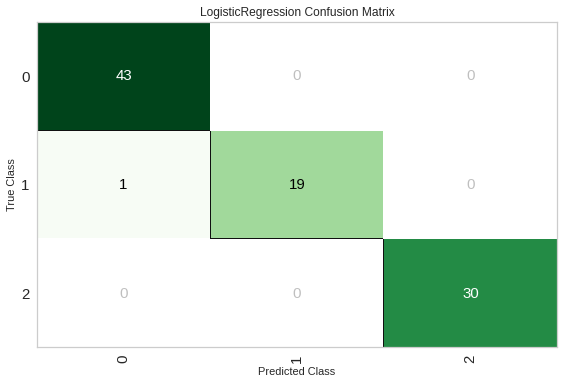

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_et, plot = 'confusion_matrix')

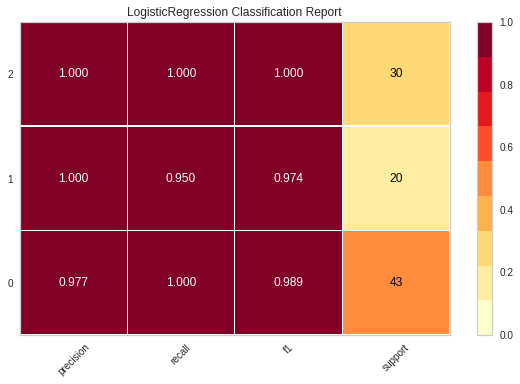

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_et, plot = 'class_report')

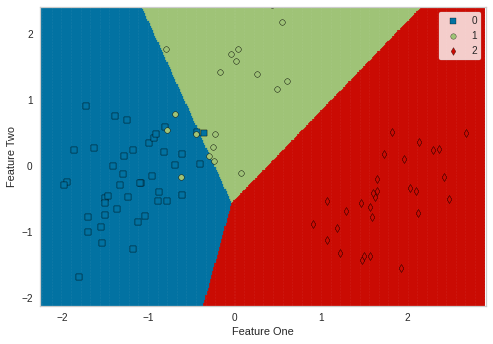

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_et, plot='boundary')

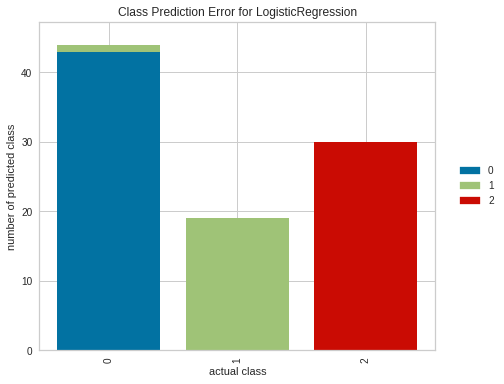

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_et, plot = 'error')

from the above we can see the model show high accuracy, recall and precision score with most of the classes in the target variable. In the boundary plot most point being present in their respective region and most of the points being classified as TP(True Positive) in the classification report being classified right.

In [ ]:
predict_model(tuned_et);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6044, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9892,1.0,0.9833,0.9895,0.9892,0.983,0.9832


In [ ]:
final_et = finalize_model(tuned_et)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6044, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6044, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_i

In [ ]:
print(final_et)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6044, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
unseen_predictions = predict_model(final_et, data=df_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6044, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9714,1.0,0.9722,0.9755,0.9719,0.9541,0.9553


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species,island,Label,Score
83,-1.622954,1.143766,-0.565361,-0.002197,1,0,2,0,0.9999
163,1.430917,1.601510,-0.493934,-0.534479,1,1,1,1,0.9967
342,0.235124,-1.195816,0.791756,1.250229,0,2,0,2,0.9972
73,0.345505,0.889463,-0.279652,-0.064819,1,0,2,1,0.5300
134,-1.071049,0.228277,-0.993924,-0.972828,0,0,1,0,0.9857


Notice that all of the metrics for final_knn are now set to a perfect 1.000. This is because the final_knn variable is trained on the complete dataset including the test/hold-out set.

In [ ]:
data_fs=df[df.columns.difference(['species','sex','island','body_mass_g'])]
explainer = shap.Explainer(final_et,data_fs)
shap_values = explainer.shap_values(data_fs)

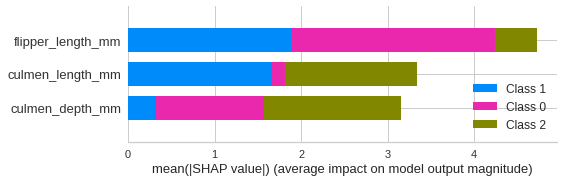

In [ ]:
shap.summary_plot(shap_values, data_fs, plot_type="bar")

the above shows which features most contribute to prediction. in this case it is 'flipper_length_mm'

# linear regression

In [ ]:
from sklearn.model_selection import train_test_split
X=df[df.columns.difference(['culmen_length_mm'])]
y=df['culmen_length_mm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [ ]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

fitting the model with train dataset

In [ ]:
linear_odds = reg.coef_
pd.DataFrame(linear_odds, 
             X_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
species,1.438270
culmen_depth_mm,0.519491
sex,0.393922
island,0.098711
flipper_length_mm,0.030700
body_mass_g,-0.183462


Here we are mapping the coefficient to their respective variable

In [ ]:
odds = np.exp(reg.coef_)
pd.DataFrame(odds, 
             X_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
species,4.213400
culmen_depth_mm,1.681171
sex,1.482784
island,1.103748
flipper_length_mm,1.031176
body_mass_g,0.832384


When the variable "species" is increased, there is increase in culmen_length_mm by more than 4x (i.e. 4.213). In contrast, as "body_mass_g" concentration rises, there is increase in culmen_length_mm by only  0.83 .

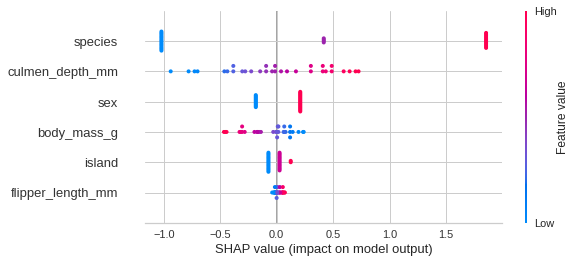

In [ ]:
lg_ex = shap.Explainer(reg, X_train)
shap_values_lg = lg_ex(X_test)
shap.plots.beeswarm(shap_values_lg, max_display=15)


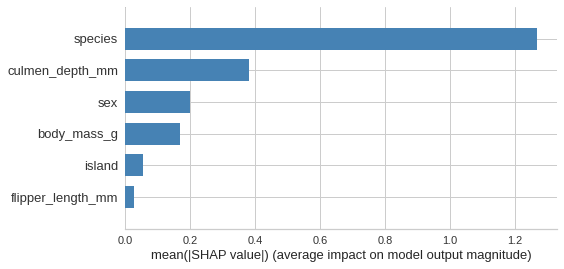

In [ ]:
shap.summary_plot(shap_values_lg, X_train, plot_type="bar", color='steelblue')

We can see species contributes the most and 'flipper_length_mm' the least

#tree XGBoost

In [ ]:
X=df[df.columns.difference(['species'])]
y=df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 326 to 132
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   body_mass_g        31 non-null     float64
 1   culmen_depth_mm    31 non-null     float64
 2   culmen_length_mm   31 non-null     float64
 3   flipper_length_mm  31 non-null     float64
 4   island             31 non-null     int64  
 5   sex                31 non-null     int64  
dtypes: float64(4), int64(2)
memory usage: 1.7 KB


In [ ]:
import xgboost as xgb


xgb_cl = xgb.XGBClassifier(random_state=0)
xgb_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
pred_train= xgb_cl.predict(X_train)
pred_test = xgb_cl.predict(X_test)
print("the accuracy score for Train Data : ",accuracy_score(y_train, pred_train))
print("the accuracy score for Test Data : ",accuracy_score(y_test, pred_test))

the accuracy score for Train Data :  1.0
the accuracy score for Test Data :  1.0


In [ ]:
print("MAE for train : ",mae(y_train, pred_train))
print("MAE for train : ",mae(y_test, pred_test))

MAE for train :  0.0
MAE for train :  0.0


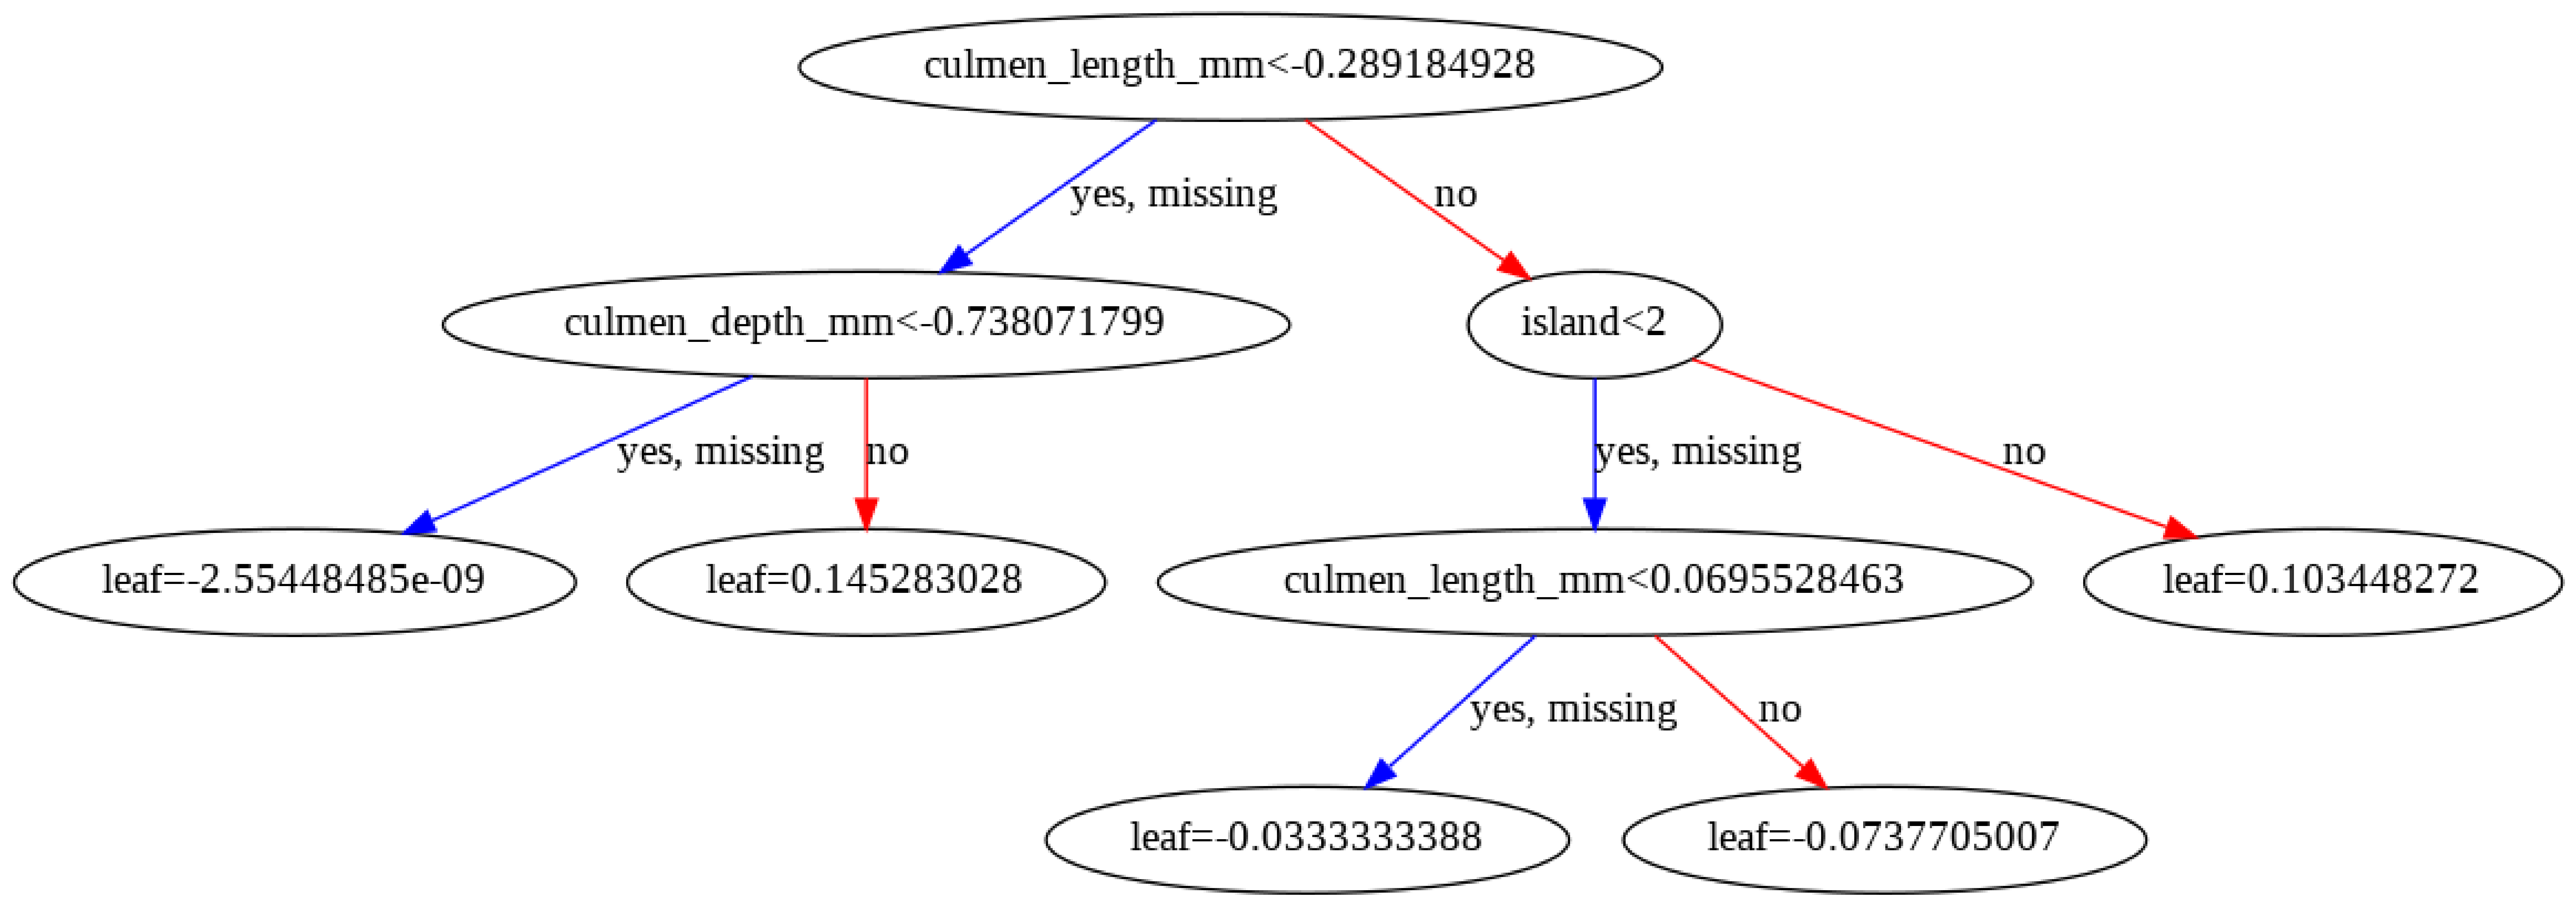

In [ ]:
import matplotlib.pyplot
xgb.plot_tree(xgb_cl, num_trees=0)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(150, 100)

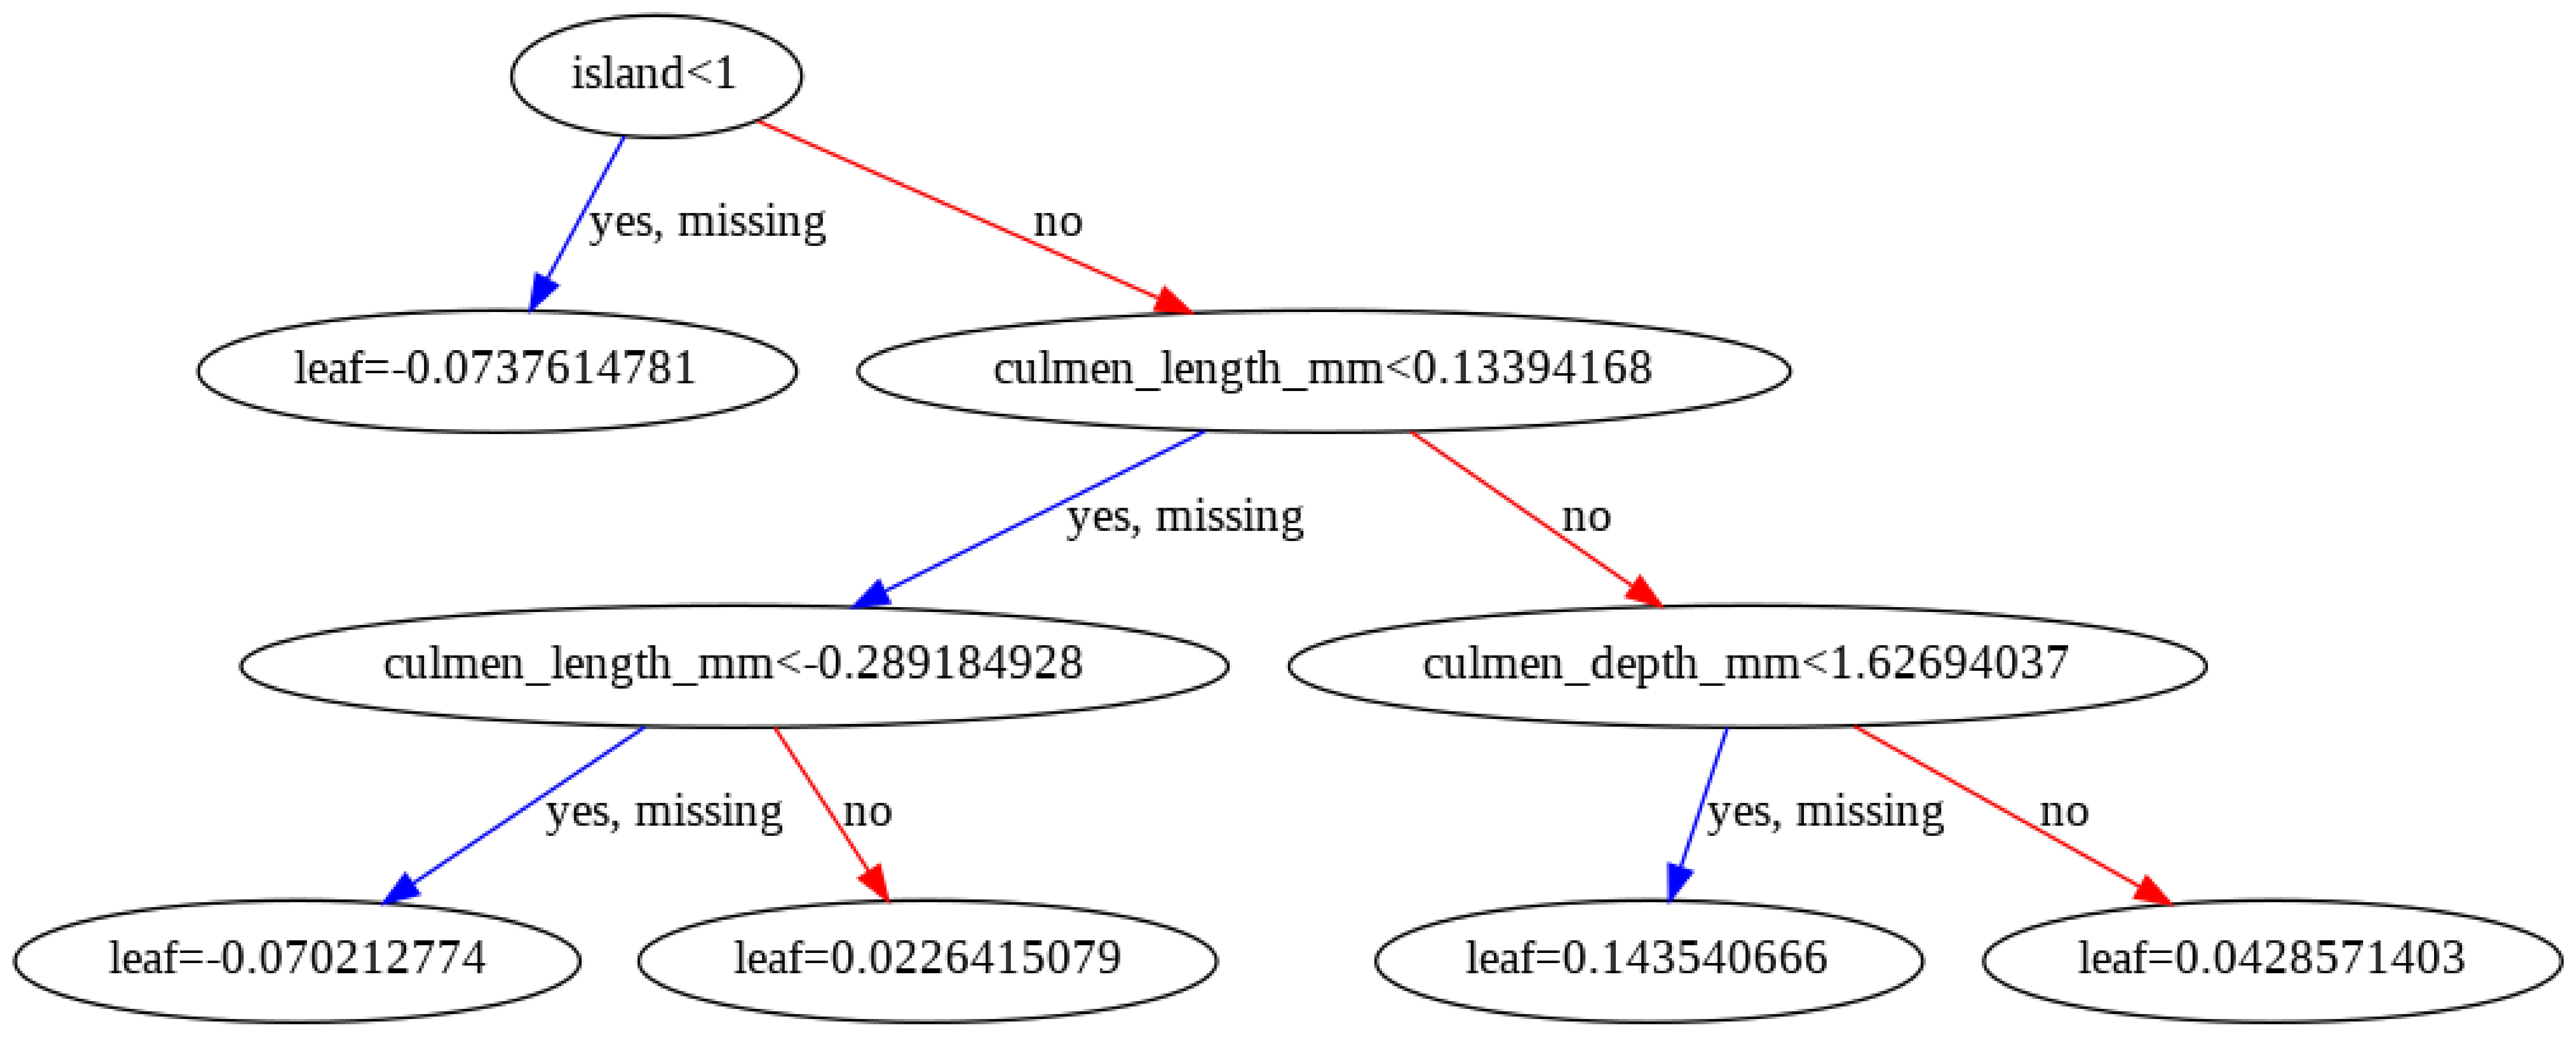

In [ ]:
xgb.plot_tree(xgb_cl, num_trees=1)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(150, 100)

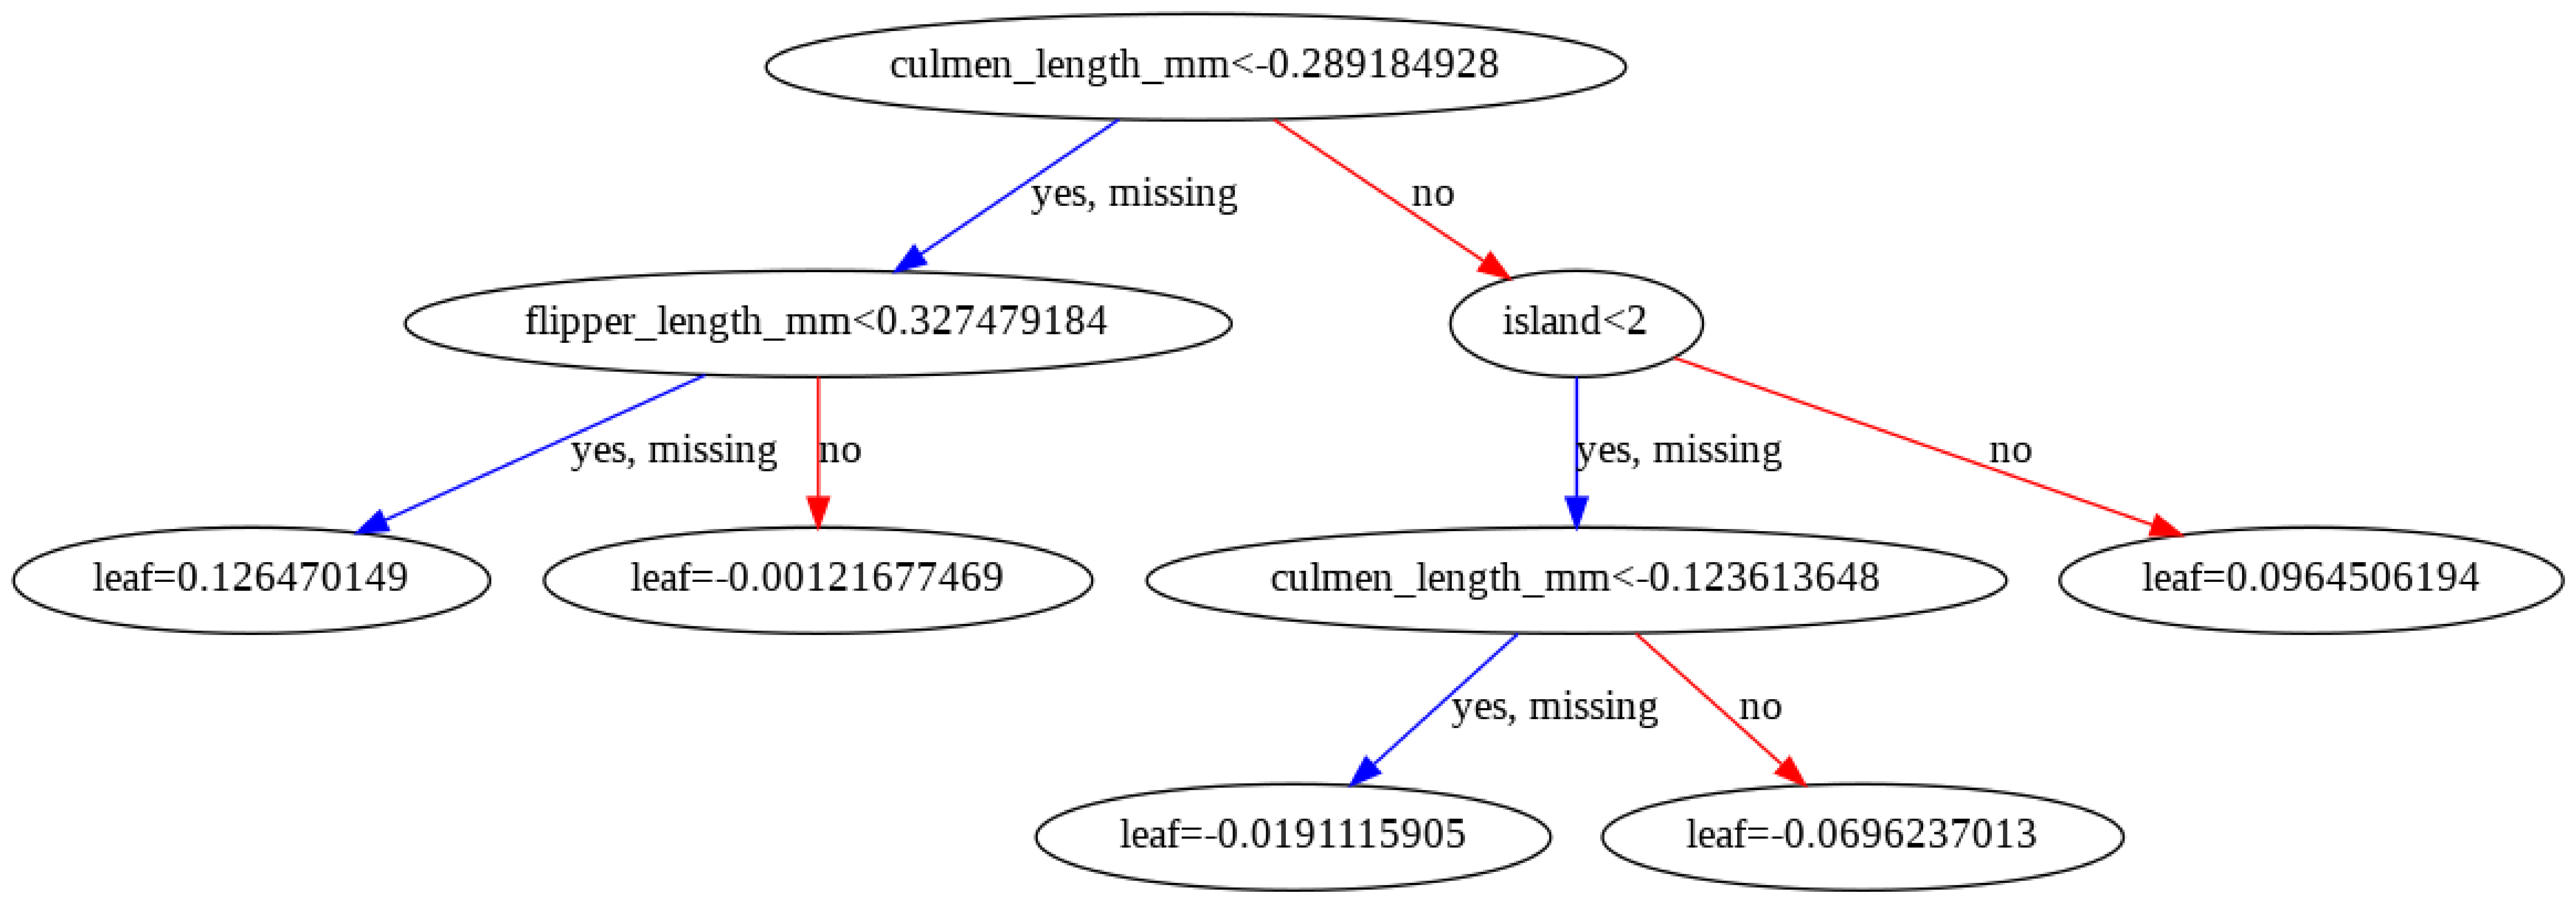

In [ ]:
xgb.plot_tree(xgb_cl, num_trees=3)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(150, 100)

The XGBoost algorithm was used to plot the first tree, which is shown in the plot above. This plot interprets all nodes (root, leaf, and intermediate). The model's final judgments and the number of splits required to get there are shown in this figure. The root node in the plot shown is "SPECIES." the tree diagrams of the first three trees' node interpretability is shown in tree section.

In [ ]:
explainer = shap.TreeExplainer(xgb_cl)
shap_values = explainer.shap_values(X_train,approximate=False, check_additivity=False)


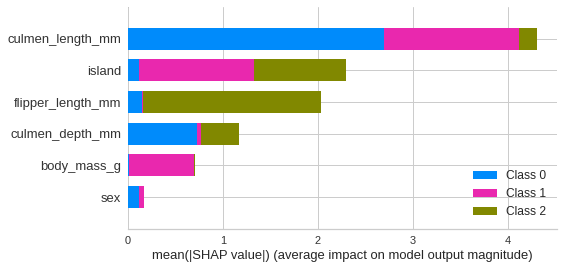

In [ ]:
shap.summary_plot(shap_values, X_train)

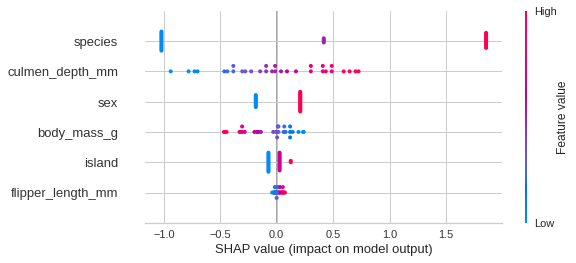

In [ ]:
shap.plots.beeswarm(shap_values_lg, max_display=15)

'culmen_length_mm' and 'sex' are the most and least significant features respectively contributing towards prediction of species. According to summary plot, higher value of 'culmen_length_mm' leads to proper classification of species. 'sex' does not contribute to prediction.

# Answer the following questions


1. Fit a linear model and interpret the regression ?

      Answer. 
When the variable "species" is increased, there is increase in culmen_length_mm by more than 4x (i.e. 4.213). In contrast, as "body_mass_g" concentration rises, there is increase in culmen_length_mm by only  0.83 .


2. Fit a tree-based model and interpret the nodes ?
     
     Answer.
The XGBoost algorithm was used to plot the first tree, which is shown in the plot. This plot interprets all nodes (root, leaf, and intermediate). 
The model's final judgments and the number of splits required to get there are shown in this figure. The root node in the plot shown is "SPECIES."
 the tree diagrams of the first three trees' node interpretability is shown in tree section.


3. Use auto ml to find the best model ?

     Answer.
     Pycaret is Used to perform MultiClass classification and best model is selcted by the compare_model() method. 



4. Run SHAP analysis on the models from steps 1, 2, and 3, interpret the SHAP values and compare them with the other model interpretability methods?

     Answer:
     
     After running SHAP analysis on **model 1** (i.e. Linear Regression), we have found that 'species' is the top feature in the dataset impacting the model’s output as represented in the beeswarm and summary plots whereas 'body_mass_g' is the least important feature. According to beeswarm plot, higher value of 'species' (2) leads higher culmen length. Lower value of 'species'  leads to lower culmen length. Similarly, culmen depth , sex, island and flipper length have positive impact on model output.

      **model 2** (i.e. XGBoost)
      'culmen_length_mm' and 'sex' are the most and least significant features respectively contributing towards prediction of species. According to summary plot, higher value of 'culmen_length_mm' leads to proper classification of species. 'sex' does not contribute to prediction.
        
     **model 3**
     by referring the above shap summary plot, 'flipper_legth_mm' is the most important and dominant feature in the model to predict target variable. Where as, 'culmen_depth_mm' is less important.the model does feature selection while creation so on 3 coloumns are used which are dominant 'flipper_length_mm' being the most dominant among them. 
  

# References

1) Pycaret offcial documentation

2) Refered Towards Data Science

3) Eli5 official documentation

4) towards data science

5) youtube - stat quest

6) geeksforgeeks

7) Seaborn

8) matplotlib

9) Sklearn documentation



the official pycaret documentaion has notebooks for regression, binary and MuliClass Classification. The algorithms for imputation were directly referred from sklearn documentation and geeksforgeeks website. For understanding of concepts related to Permutation Importance, classification_report and confusion matrix multiple sources on youtube were used. For plots seaborn’s and matplotlib’s official website was used.

Copyright (c) 2022 Pratik-Prakash-Sannakki

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.